# Reading GEO processed data
### The following files were downloaded from GEO's website using a webbrowser

GSE73745_signal_intensities.txt
Expecting raw meth/unmeth probe data
Found probe names in `ID_REF` column and setting as index.
24 Samples with Methylated/Unmethylated probes intensities found. Calculating Beta Values.
Found 24 samples and dropped 49 meta data columns.
(485577, 24)


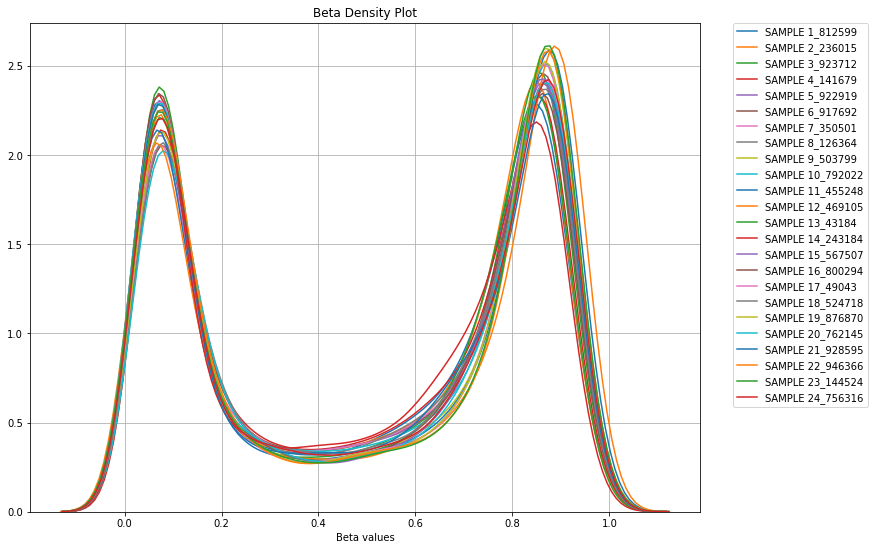

GSE46573_signal_intensities.txt
Expecting raw meth/unmeth probe data
Found probe names in `ID_REF` column and setting as index.
22 Samples with Methylated/Unmethylated probes intensities found. Calculating Beta Values.
Found 22 samples and dropped 45 meta data columns.
(485577, 22)


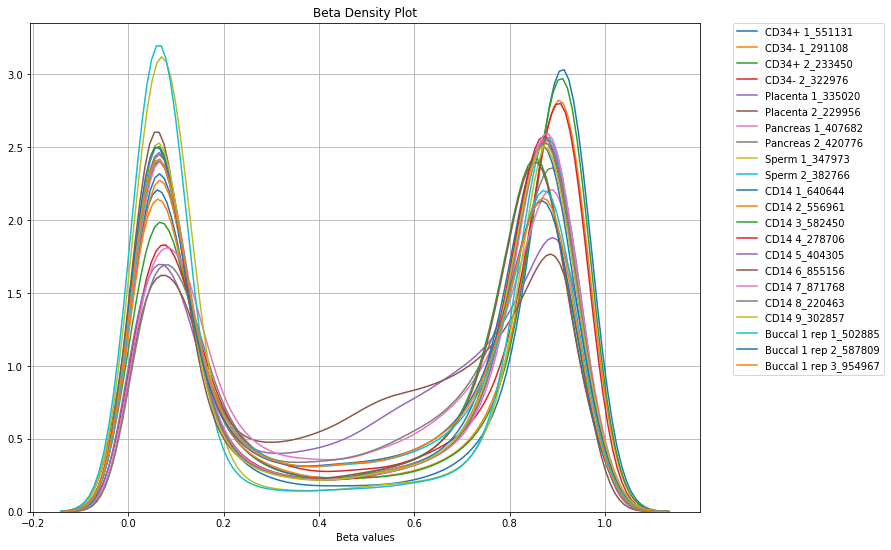

GSE72354_matrix-signal-intensities.csv
Expecting raw meth/unmeth probe data
Found probe names in `ID_REF` column and setting as index.
34 Samples with Methylated/Unmethylated probes intensities found. Calculating Beta Values.
Found 34 samples and dropped 69 meta data columns.
(485577, 34)


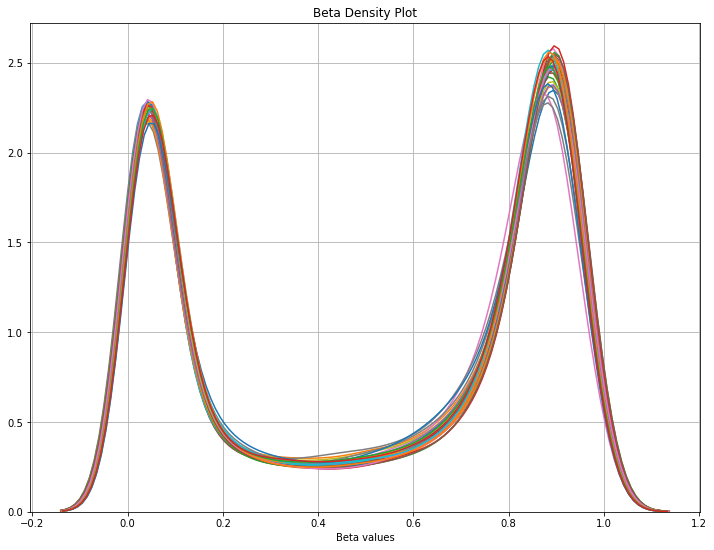

GSE72120_matrix_signal_intensities.txt
Expecting raw meth/unmeth probe data
Found probe names in `ID_REF` column and setting as index.
72 Samples with Methylated/Unmethylated probes intensities found. Calculating Beta Values.
Found 72 samples and dropped 145 meta data columns.
(485577, 72)


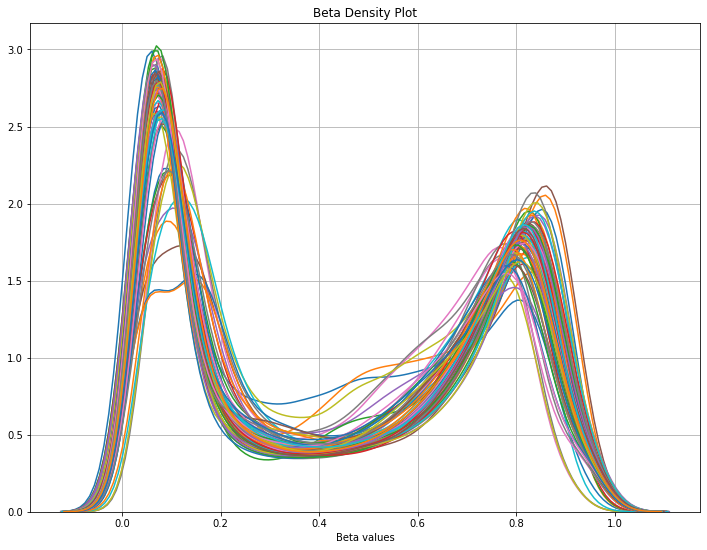

GSE133355_processed_data_sheets.xlsx
Converted 28 samples from string to float16.
Found 28 samples and dropped 18 meta data columns.
(16804, 28)


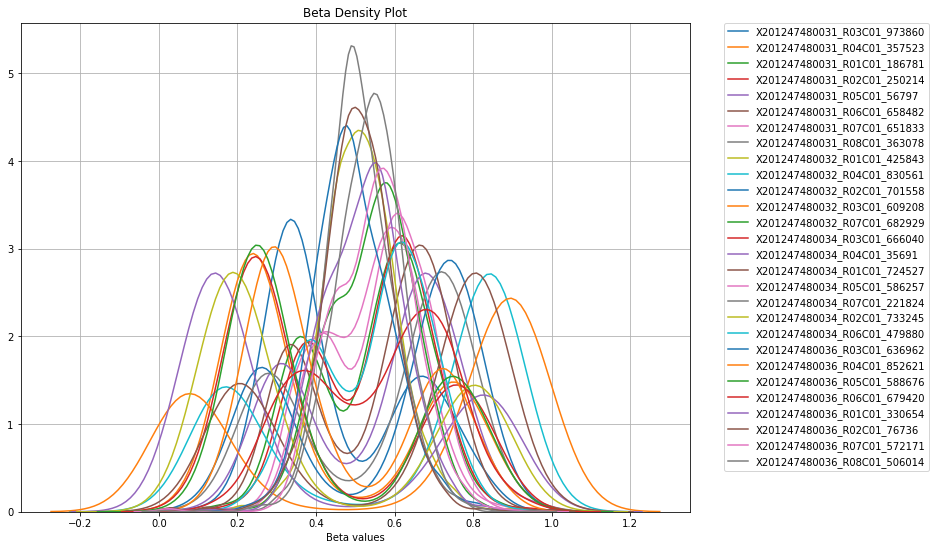

GSE61653_non-normalized.txt
Found probe names in `ID_REF` column and setting as index.
128 Samples with Methylated/Unmethylated probes intensities found. Calculating Beta Values.
Found 128 samples and dropped 257 meta data columns.
(485577, 128)


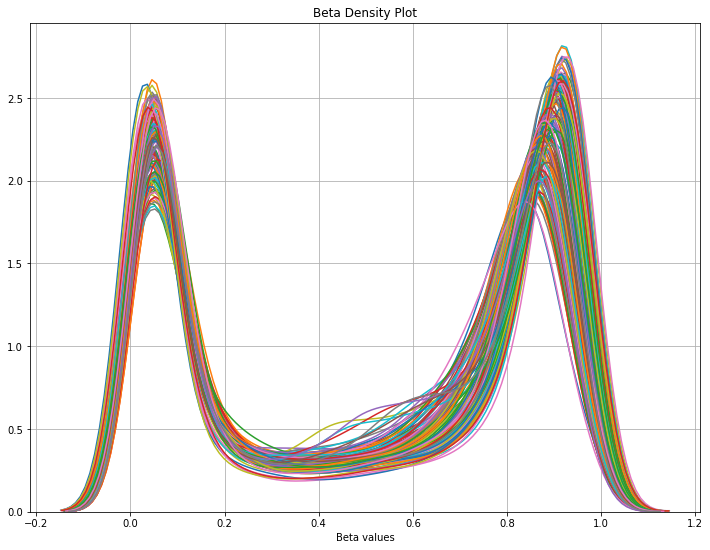

GSE111165_data_processed_detection_p_val_EPIC.csv
Found probe names in `ID_REF` column and setting as index.
Found 101 samples and dropped 103 meta data columns.
(822996, 101)


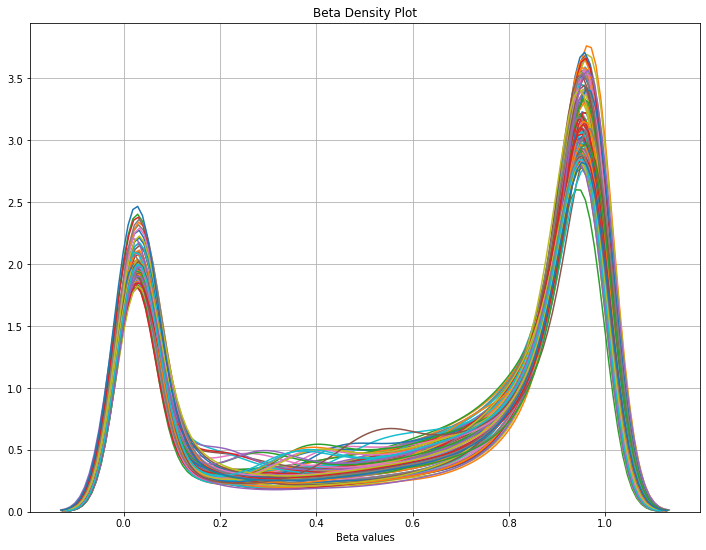

In [1]:
%matplotlib inline
import methylprep
import methylcheck
from pathlib import Path
import pandas as pd
QC = Path('/Volumes/LEGX/qc_testing/')

#OK FILE = 'GSE73745_signal_intensities.txt'
#OK FILE = 'GSE46573_signal_intensities.txt'
#OK FILE = 'GSE72354_matrix-signal-intensities.csv'
#OK FILE = 'GSE72120_matrix_signal_intensities.txt'
#OK FILE = 'GSE72556_Matrix_signal.txt' -- doesn't actually require beta-calc; betas are there
#OK FILE = 'GSE133355_processed_data_sheets.xlsx' # -- multiline header works now
#OK FILE = 'GSE111165_data_processed_detection_p_val_EPIC.csv' -- includes betas
#OK FILE = 'GSE61653_non-normalized.txt'
#FAIL FILE = 'GSE78975_matrix_detection_pval.csv' -- non-standard sample names, and might not include betas or intensities
#FAIL FILE = 'GSE50759_signal_intensities.txt' # -- multiline header, bad probe list (doesn't line up, and sample names aren't logical)
#FAIL FILE = 'GSE94876_matrix-signal-intensities.txt' -- uses .Signal_A ... .Signal_B instead

test_files = [
    'GSE73745_signal_intensities.txt',
    'GSE46573_signal_intensities.txt',
    'GSE72354_matrix-signal-intensities.csv',
    'GSE72120_matrix_signal_intensities.txt',
    'GSE133355_processed_data_sheets.xlsx',
    'GSE61653_non-normalized.txt',
    #'GSE78975_matrix_detection_pval.csv',
    'GSE111165_data_processed_detection_p_val_EPIC.csv',
]

def test_find_calc_beta(FILE, gen_test_data=False):
    suffix = Path(FILE).suffix
    outfilename = f"{FILE.split('_')[0]}_test{suffix}"    
    infile = Path(QC,FILE)
    outfile = Path(QC,outfilename)
    if gen_test_data:
        if suffix == '.csv':
            temp = pd.read_csv(infile)
            sub = temp.iloc[:200,:]
            sub.to_csv(outfile)
        elif suffix == '.txt':
            temp = pd.read_csv(infile, sep='\t')
            sub = temp.iloc[:200,:]
            sub.to_csv(outfile, sep='\t')
        elif suffix == '.xlsx':
            temp = pd.read_excel(infile)
            sub = temp.iloc[:200,:]
            sub.to_excel(outfile)
    g54 = methylcheck.read_geo(infile, verbose=True)
    if type(g54) == type(None):
        return
    print(g54.shape)
    g54.head()
    methylcheck.beta_density_plot(g54)

for FILE in test_files:
    print(FILE)
    test_find_calc_beta(FILE, gen_test_data=True)

In [4]:
# these files are small sub-sets of the real GEO files, created to ensure read_geo() can parse various file structures without commiting huge files to the repo.
unit_test_files = [
    'GSE111165_test.csv',
    'GSE73745_test.txt',
    'GSE46573_test.txt',
    'GSE72354_test.csv',
    'GSE72120_test.txt',
    #'GSE133355_test.xlsx', # this one failed with the multiline header in sub-file. so I just truncated the original file
    'GSE133355_processed_test.xlsx',
    'GSE61653_test.txt',
    'GSE72556_test.txt',
    'GSE138279_test.csv',
]